## Introduction

* **Natural Language Processing(NLP)** can analyze text and speech, performing a wide range of tasks that focus primarily on language structure. However, it will not tell you what was meant or intended by specific language. **Natural Language Uderstanding(NLU)** allows computer applications to infer intent from language**

* **Topic modeling** is an algorithm for extracting the topic or topics for a collection of documents. It is the widely used text mining method in Natural Language Processing to gain insights about the text documents. The algorithm is analogous to * **dimensionality reduction** techniques used for numerical data.
* **
* It can be considered as the process of obtaining required features from the bag of words. This is highly important because in NLP each word present in the corpus is considered as a feature. Thus feature reduction helps us focusing on the right content instead of wasting our time going through all the text in the data.*
* In * **NLU** tasks, there is a hierarchy of lenses through which we can extract meaning — from words to sentences to paragraphs to documents. At the document level, one of the most useful ways to understand text is by analyzing its topics. The process of learning, recognizing, and extracting these topics across a collection of documents is called * **topic modeling.**

* All topic models are based on the same basic assumption:
* **
    each document consists of a mixture of topics
    each topic consists of a collection of words.
* **
*In other words, topic models are built around the idea that the semantics of our document are actually being governed by some hidden, or * **latent** variables that we are not observing. As a result, the goal of topic modeling is to uncover these latent variables — topics — that shape the meaning of our document and corpus.*

* Definitions:
    * **C:** collection of documents containing N texts.
    * **V:** vocabulary (the set of unique words in the collection)

* In general, what benefit and technique it involves :
* **
* **Dimensionality Reduction** : 
    Topic modeling is a form of dimensionality reduction. Rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in V}, we can represent the text in its topic space as {Topic_i: weight(Topic_i, T) for Topic_i in Topics}. Notice that we’re using Topics to represent the set of all topics.
* **
* **Unsupervised Learning** : 
    Topic modeling can be easily compared to clustering. As in the case of clustering, the number of topics, like the number of clusters, is a hyperparameter. By doing topic modeling we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a certain weight.
* **
* **A Form of Tagging** : 
    If document classification is assigning a single category to a text, topic modeling is assigning multiple tags to a text. A human expert can label the resulting topics with human-readable labels and use different heuristics to convert the weighted topics to a set of tags.

* **Why is Topic Modeling useful?**
* There are several scenarios when topic modeling can prove useful. Here are some of them:
* **
* **Text classification** – Topic modeling can improve classification by grouping similar words together in topics rather than using each word as a feature
* **Recommender Systems** – Using a similarity measure we can build recommender systems. If our system would recommend articles for readers, it will recommend articles with a topic structure similar to the articles the user has already read.
* **Uncovering Themes in Texts** – Useful for detecting trends in online publications for example

* **Topic Modeling Algorithms**
* There are few algorithms for doing topic modeling. The ones we will be proceeding with are and these are the most popular ones and the best considered in the industry is LDA:
* **
* **LDA – Latent Dirichlet Allocation** – Its foundations are Probabilistic Graphical Models.
* **LSA or LSI – Latent Semantic Analysis or Latent Semantic Indexing** – Uses Singular ValueDecomposition (SVD) on the Document-Term Matrix. Based on Linear Algebra
* **NMF – Non-Negative Matrix Factorization** – Based on Linear Algebra

* Here are some things all these algorithms have in common:
* **
The number of topics * **(n_topics)** as a parameter. None of the algorithms can infer the number of topics in the document collection.
* **
All of the algorithms have as input the Document-Word Matrix (or * **Document-Term Matrix**). DWM[i][j] = The number of occurrences of word_j in document_i
* **
All of them output 2 matrices: WTM (* **Word Topic Matrix**) and TDM (* **Topic Document Matrix**). The matrices are significantly smaller and the result of their multiplication should be as close as possible to the original DWM matrix.

## Problem Statement

* We have a lot of documents and those are from multi-domain and the documents nataure are also different. Some might be showing comversation between 2 or more people, some might be giving factual information some might be abstrative in nature.
* **
* The length of the documents are also varying in nature. Some might have 100 words while rest might have around 1000 words so one document can be 10 times larger then the another document.
* **
* To get an idea behind what in general a document is about, we will extract topics out of them. Each document can be respresented in n number of topics but will be only going with the top3 topics or the top most topic a document might contain to get a gist of the document.

* **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  
le=WordNetLemmatizer()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
from textblob import TextBlob
import scipy.stats as stats
from collections import Counter
from sklearn.manifold import TSNE
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Night_Hawk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Night_Hawk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [3]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV

import gensim
from gensim import models, corpora
from gensim.models import LsiModel
from gensim import similarities

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [5]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns

* Importing the dataset

In [7]:
documents = pd.read_csv('../input/documents.csv')
len(documents)

C:\Users\Night_Hawk\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


25637

In [100]:
documents.head()

,document
0,My husband is a born shopper. He loves to look...
1,Tea drinking was common in China for nearly on...
2,"Once upon a time, there was a scholar who want..."
3,When newspapers and radio describe the damage ...
4,Below is a page adapted from About Wikipedia ...


* Splitting documents into train and test where train consists of 90% of the documents and test 10%.
* The reason 10% for the test is just to give an idea how to find a topic/topic(s) for unseen documents and 90% for the train might have a sufficient data to train

In [72]:
train_documents = documents[:int(len(documents)*0.9)]
test_documents  = documents[int(len(documents)*0.9):]
print(len(train_documents), len(test_documents)) 
assert len(train_documents)+len(test_documents) == len(documents)

23073 2564


* **Cleaning the documents**

* Replacing the short form having apostrophe with the complete form

In [73]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
dataset = [train_documents, test_documents]

* **Text Cleaning**
* **
* Steps :
    * **
    Replacing the short forms with the complete form such as I've to I have which might give some significane
    * **
    Removing all the characters except words as we are only concerned with the words
    * **
    **Tokenizing** each word using nltk library which is converting a text into a list of tokens or words such as "This is topic modeling case study" to ['This', 'is', 'topic', 'modeling', 'case', 'study']
    * **
    **Lemmatizing** the above word token which is converting a word to a root word such as "making" to "make" so that multiple words can be converted into a single word as each word can be represented into many Part of Speech tags such as noun, adjective, verb etc.. and storing it in a list if and only if word is not a stop word which arer ['is','the','for'] and mony more and also if the length of each token is greater than 3 alphabets because there might be some words which do not come in stop words but might not give any significant meaning and will only dimensions as each word extra will have extra dimensions to compute for.
    * **
    The finally joining the individual tokens from a list to make a sentence

In [16]:
def clean_documents(text):
    
    if pd.isnull(text):
        return text
    
    text = text.lower()
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
            
    text         = re.sub("[^a-zA-Z#]", ' ', text)
    word_tokens  = nltk.word_tokenize(text)
    tokens       = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text =" ".join(tokens)
    
    return cleaned_text

In [74]:
train_documents['clean_document'] = train_documents['document'].progress_apply(lambda x: clean_documents(x))

my bar!: 100%|██████████████████████████████████████████████████████████████████| 23073/23073 [02:34<00:00, 149.62it/s]


In [106]:
train_documents.head()

,document,clean_document
0,My husband is a born shopper. He loves to look...,husband born shopper love look thing touch lik...
1,Tea drinking was common in China for nearly on...,drinking common china nearly thousand year any...
2,"Once upon a time, there was a scholar who want...",upon time scholar wanted gain knowledge even t...
3,When newspapers and radio describe the damage ...,newspaper radio describe damage caused hurrica...
4,Below is a page adapted from About Wikipedia ...,page adapted wikipedia take full advantage wik...


In [43]:
test_documents['clean_document'] = test_documents['document'].progress_apply(lambda x: clean_documents(x))

my bar!: 100%|████████████████████████████████████████████████████████████████████| 2564/2564 [00:19<00:00, 129.70it/s]


In [108]:
train_docs = train_documents['clean_document'].copy()
test_docs  = test_documents['clean_document'].copy()

* Looking at the documents - * **EDA**

In [109]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [28]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

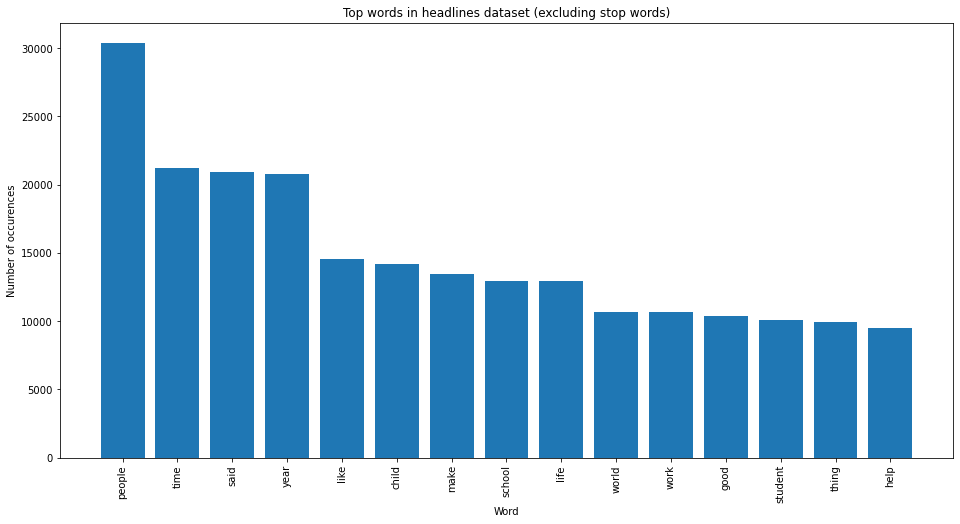

In [111]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=train_documents['clean_document'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [112]:
def stats_of_documents(data_df):
    
    data = data_df['clean_document'].tolist()
    tagged_headlines = [TextBlob(data[i]).pos_tags for i in range(len(data))]
    
    tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

    word_counts = [] 
    pos_counts = {}

    for headline in tagged_headlines_df[u'tags']:
        word_counts.append(len(headline))
        for tag in headline:
            if tag[1] in pos_counts:
                pos_counts[tag[1]] += 1
            else:
                pos_counts[tag[1]] = 1

    print('Total number of words: ', np.sum(word_counts))
    print('Mean number of words per headline: ', np.mean(word_counts))
    print('Minimum number of words per headline: ', np.min(word_counts))
    print('Maximum number of words per headline: ', np.max(word_counts))

    pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
    pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

    fig, ax = plt.subplots(figsize=(18,8))
    ax.bar(range(len(pos_counts)), pos_sorted_counts);
    ax.set_xticks(range(len(pos_counts)));
    ax.set_xticklabels(pos_sorted_types);
    ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
    ax.set_xlabel('Type of Word');


Total number of words:  3160055
Mean number of words per headline:  136.95899969661508
Minimum number of words per headline:  28
Maximum number of words per headline:  572


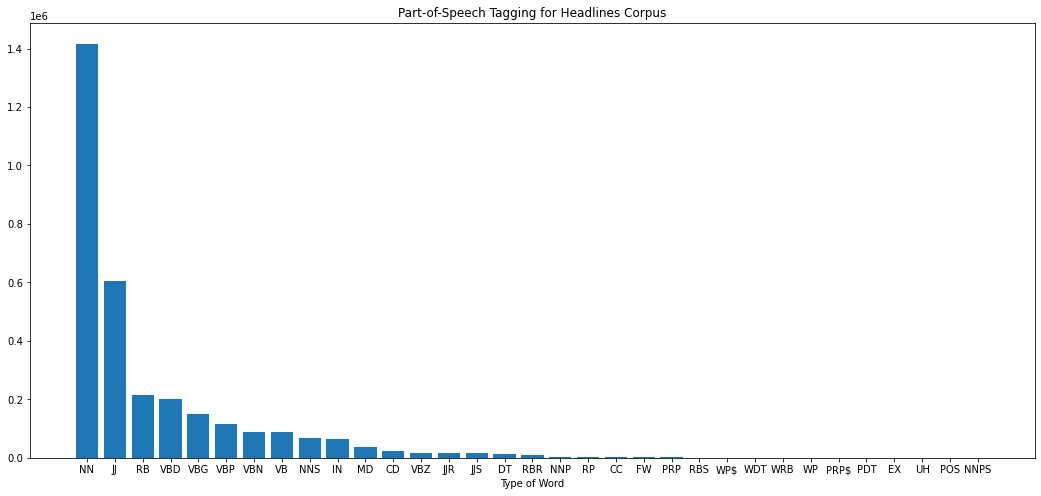

In [113]:
stats_of_documents(train_documents)

## Topic Modeling

* **LSA**

* Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

* The first step is generating our document-term matrix. Given m documents and n words in our vocabulary, we can construct an m × n matrix A in which each row represents a document and each column represents a word. In the simplest version of LSA, each entry can simply be a raw count of the number of times the j-th word appeared in the i-th document. 
* In practice, however, raw counts do not work particularly well because they do not account for the significance of each word in the document. For example, the word “nuclear” probably informs us more about the topic(s) of a given document than the word “test.”
* **
* Consequently, LSA models typically replace raw counts in the document-term matrix with a tf-idf score. Tf-idf, or term frequency-inverse document frequency, assigns a weight for term j in document i as follows:
* **
* **w(i,j) = tf(i,j) * log(N/df(j))**
* where,
* w(i,j)       = tf-idf score
* tf(i,j)      = occurences of term in documents
* In log(N/df(j)), N = total documents and df(j) = documents containing words

* Dimensionality reduction can be performed using truncated SVD. * **SVD, or singular value decomposition**, is a technique in linear algebra. factorizes into 3 separate matrics : * **M = U*S*V**, where S is a diagonal matrix of the singular values of M.
* truncated SVD reduces dimensionality by selecting only the t largest singular values, and only keeping the first t columns of U and V. In this case, t is a hyperparameter we can select and adjust to reflect the number of topics we want to find.

* **U = (m ⨉ t)** emerges as our document-topic matrix, 
* **V = (n ⨉ t)** becomes our term-topic matrix. 
* In both U and V, the columns correspond to one of our t topics. In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

* With these document vectors and term vectors, we can now easily apply measures such as cosine similarity to evaluate:
* **
    the similarity of different documents
    the similarity of different words
    the similarity of terms (or “queries”) and documents (which becomes useful in information retrieval, when we want to retrieve passages most relevant to our search query).

* Some important points:-
* **
    LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

    Default values for min_df & max_df worked well.
    
    LSI topics are not supposed to make sense; since LSI allows negative numbers, it boils down to delicate cancellations between topics and there’s no straightforward way to interpret a topic.

* Fitting using **TfIdf**, 4000 features are taken as the threshold so words having sufficient count will only be taken. As our vocabulary is not diverse, most words are from noun and more or less they are talking about people, childre, school ete etc...

In [75]:
vect        = TfidfVectorizer(stop_words=stop_words,max_features=4000)
vect_text   = vect.fit_transform(train_documents['clean_document'])

In [76]:
# We will be going with the 10 topics as I tried with 15,20 topics but there was no improvement.
# n_iter is for 10 iterations with random_state as 42 to keep the results fixed

In [77]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top   = lsa_model.fit_transform(vect_text)

In [117]:
l=lsa_top[1]
print("Document 0 :")
for i,topic in enumerate(l):
    print(i,topic)

Document 0 :
0 0.24391332665136545
1 -0.09316478689000382
2 -0.01707819563114634
3 -0.010652781962036085
4 -0.00882893544179379
5 0.02850312831920547
6 0.03737042752578104
7 0.0031489848983383187
8 -0.07164701153049846
9 0.0713251400383467


In [118]:
def topics_document(model_output, n_topics , data):
    '''
    returns a dataframe for each document having topic weightages
    and the dominant topic for each doc. 
    '''
    
    # column names
    topicnames = ["Topic" + str(i) for i in range(n_topics)]
    # index names
    docnames = ["Doc" + str(i) for i in range(len(data))]
    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(model_output, 2), columns=topicnames, index=docnames)
    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic["dominant_topic"] = dominant_topic
    
    return df_document_topic

In [119]:
documet_topic_lsa = topics_document(lsa_top, n_topics=10, data=train_documents)
documet_topic_lsa

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.20,-0.10,0.09,-0.05,0.01,-0.02,0.02,-0.02,-0.06,0.10,0
Doc1,0.24,-0.09,-0.02,-0.01,-0.01,0.03,0.04,0.00,-0.07,0.07,0
Doc2,0.18,-0.03,-0.02,-0.01,0.04,-0.05,-0.01,-0.04,0.01,-0.05,0
Doc3,0.11,-0.03,0.01,-0.00,0.02,0.02,-0.02,-0.00,-0.03,-0.01,0
Doc4,0.12,0.02,-0.07,-0.00,0.09,0.04,-0.02,0.01,0.07,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...
Doc23068,0.08,0.00,-0.03,-0.02,-0.02,0.04,-0.05,-0.00,-0.03,0.02,0
Doc23069,0.18,-0.01,-0.04,0.00,0.07,-0.02,-0.09,-0.04,0.09,0.06,0
Doc23070,0.20,0.06,-0.00,-0.10,-0.09,0.01,-0.04,-0.03,0.02,-0.02,0
Doc23071,0.29,0.20,0.12,-0.10,-0.07,0.00,-0.03,-0.02,0.01,-0.00,0


In [78]:
lsa_keys = get_keys(lsa_top)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

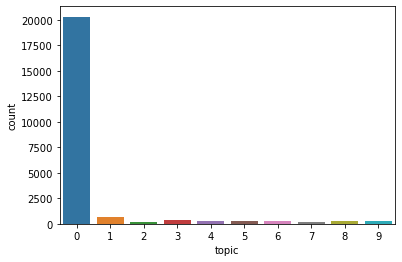

In [121]:
topics_df = pd.DataFrame({'topic' : lsa_categories, 'count' : lsa_counts})
sns.barplot(x=topics_df['topic'], y = topics_df['count'])
plt.show()

* This plot is showing how the topics are not able to differentiate the words between them and the maximum documents almost more than 90% of the documents are assigned topic 0.
* Very few are documents are assigned other topics
* **
* Below we will see what are the **top 10 words** for each documents

In [122]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
people child said school time year student would life like 

Topic 1: 
student school child teacher parent class english education college language 

Topic 2: 
mother child father said school parent would went asked girl 

Topic 3: 
child parent kid family people food life brain adult need 

Topic 4: 
english language book word friend people read reading learn thing 

Topic 5: 
english child chinese language china book city country world year 

Topic 6: 
water food school english animal plant tree like fish city 

Topic 7: 
english language said study word brain woman animal water sleep 

Topic 8: 
book reading read water animal story plant earth library scientist 

Topic 9: 
food book reading read eating meal chinese restaurant said vegetable 



In [23]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors, n_topics):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [24]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:10]

* Visualizing topics with * **t-SNE**

* * **t-Distributed Stochastic Neighbor Embedding (t-SNE)** is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.
* **
* The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space.

* KL is a statistical measure which is used to quantify how one distribution is different from another. Closer the value of **Kullback–Leibler(KL)** divergence to zero, the closeness of the corresponding words increases. In other words, the divergence value is less.

In [79]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23073 samples in 0.167s...
[t-SNE] Computed neighbors for 23073 samples in 17.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23073
[t-SNE] Computed conditional probabilities for sample 2000 / 23073
[t-SNE] Computed conditional probabilities for sample 3000 / 23073
[t-SNE] Computed conditional probabilities for sample 4000 / 23073
[t-SNE] Computed conditional probabilities for sample 5000 / 23073
[t-SNE] Computed conditional probabilities for sample 6000 / 23073
[t-SNE] Computed conditional probabilities for sample 7000 / 23073
[t-SNE] Computed conditional probabilities for sample 8000 / 23073
[t-SNE] Computed conditional probabilities for sample 9000 / 23073
[t-SNE] Computed conditional probabilities for sample 10000 / 23073
[t-SNE] Computed conditional probabilities for sample 11000 / 23073
[t-SNE] Computed conditional probabilities for sample 12000 / 23073
[t-SNE] Computed conditional probabilities for s

In [80]:
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors, n_topics=10)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(10), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(10):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                   text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

* Evidently, this is a bit a of a failed result. We have failed to reach any great degree of separation across the topic categories, and it is difficult to tell whether this can be attributed to the LSA decomposition or instead the  t -SNE dimensionality reduction process. Let's move forward and try another clustering technique.

* In Almost all the documents, the dominant topic comes out to be 0 which is having the top 10 keywords as :
    * **people, said, child, year, time, school, would, life, like, student**
* This is evident from the dataframe shown above and the tsne plot as well.

* Generating a  **Word Cloud** from the most occuring words in the topics. 
* **
* The more bigger the word is, the more frequency/weightage having for the word is and the smaller word gets, the lesser frequency/weightage for that word is

In [125]:
# Generate a word cloud image for given topic
def draw_word_cloud(index, model):
    imp_words_topic=""
    comp=model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


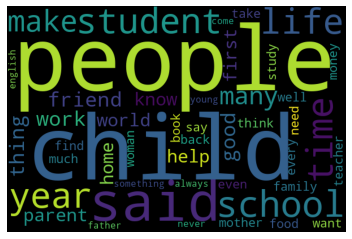

In [126]:
draw_word_cloud(0, lsa_model)

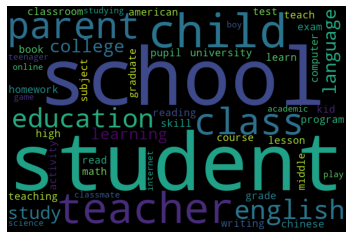

In [127]:
draw_word_cloud(1, lsa_model)

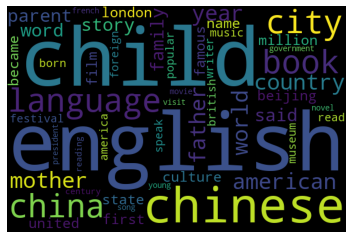

In [128]:
draw_word_cloud(5, lsa_model)

* **Predicting the topics on unseen documents**

Total number of words:  361308
Mean number of words per headline:  140.9157566302652
Minimum number of words per headline:  35
Maximum number of words per headline:  401


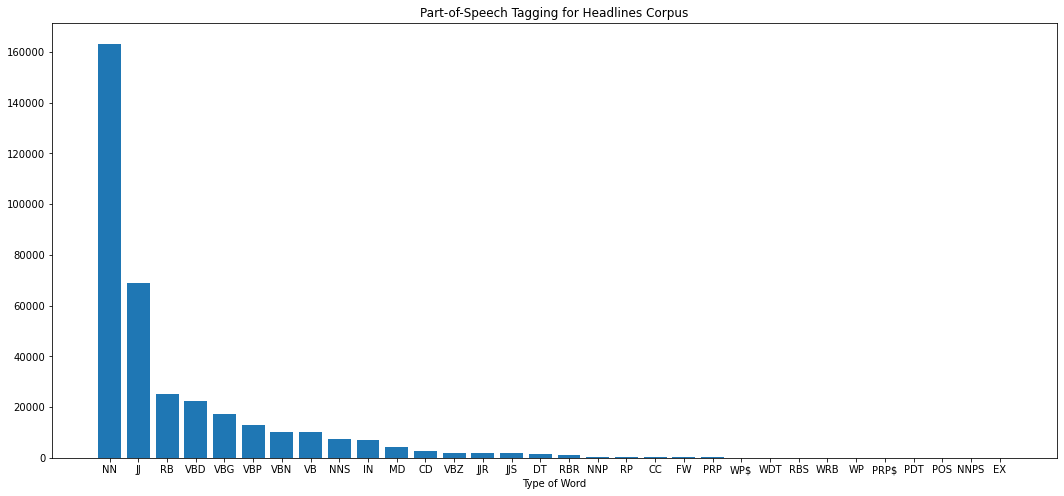

In [129]:
stats_of_documents(test_documents)

* vect is the object of the TfidfVectorizer

In [130]:
vect_text_test      = vect.transform(test_documents['clean_document'])
lsa_top_test        = lsa_model.transform(vect_text_test)

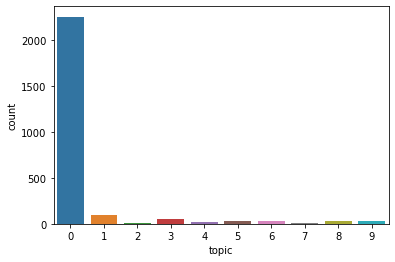

In [131]:
lsa_keys_test = get_keys(lsa_top_test)
lsa_categories_test, lsa_counts_test = keys_to_counts(lsa_keys_test)

topics_df_test = pd.DataFrame({'topic' : lsa_categories_test, 'count' : lsa_counts_test})
sns.barplot(x=topics_df_test['topic'], y = topics_df_test['count'])
plt.show()

In [132]:
documet_topic_lsa_test = topics_document(lsa_top_test, n_topics=10, data=test_documents)
documet_topic_lsa_test

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.20,0.06,0.06,0.00,-0.03,0.00,0.01,-0.04,-0.01,-0.03,0
Doc1,0.22,-0.04,0.03,0.03,0.01,0.05,-0.00,-0.03,-0.01,-0.04,0
Doc2,0.21,-0.00,-0.03,0.07,0.10,-0.13,-0.01,-0.01,0.02,-0.01,0
Doc3,0.18,-0.07,-0.10,0.03,0.09,-0.03,0.07,0.13,0.05,-0.07,0
Doc4,0.16,-0.06,0.10,0.01,-0.02,-0.01,-0.03,0.04,0.01,-0.01,0
...,...,...,...,...,...,...,...,...,...,...,...
Doc2559,0.13,-0.06,0.01,-0.03,-0.02,-0.01,0.02,0.02,0.03,-0.02,0
Doc2560,0.29,0.13,-0.01,-0.06,-0.03,-0.07,0.01,-0.09,-0.01,-0.05,0
Doc2561,0.21,-0.02,-0.13,-0.05,-0.06,0.07,-0.06,-0.04,-0.02,-0.02,0
Doc2562,0.16,-0.07,0.04,-0.03,0.02,-0.03,0.01,0.02,0.03,-0.03,0


In [214]:
# Same thing happened with the test

* **LDA**

* Providing the link for the full in depth detail explaination about the math and the implemenation for LDA.
* The reason I am providing with the link is it is difficult to explain in words and also one should be very thorough with LDA as it is the most popular apporch and trustworthy for topic modeling.
* **
* **Link** : https://towardsdatascience.com/latent-dirichlet-allocation-intuition-math-implementation-and-visualisation-63ccb616e094

* It is one of the most popular and interpretable generative models for finding topics in text data. 
* **
* There is a collection of different articles (corpus of documents), and we suspect that there are several topics that come up frequently within said corpus.
* The distributional hypothesis: 
* **
    Words that appear together frequently are likely to be close in meaning
    each topic is a mixture of different words
    each document is a mixture of different topics

* **LDA is a generative model** — it tries to determine the underlying mechanism that generates the articles and the topics.

* The full probability formula that generates a document is if we break down, we have three product sums:
    * **
* **Dirichlet distribution of topics over terms**: for each topic i amongst K topics, what is the probability distribution of words for i.
    * **
* **Dirichlet distribution of documents over topics**: for each document j in our corpus of size M, what is the probability distribution of topics for j.
    * **
* **Probability of a topic appearing given a document X the probability of a word appearing given a topic**: how likely is it that certain topics, Z, appear in this document and then how likely is that certain words, W, appear given those topics.

* The LDA topic model algorithm requires a document word matrix as the main input.
* **
* It has been created using CountVectorizer.We will consider words that has occurred at least 10 times (min_df), remove built-in english stopwords, convert all words to lowercase, and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.

In [81]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,# minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')  # num chars > 3
data_vectorized = vectorizer.fit_transform(train_documents['clean_document'])

* Training the model

In [221]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


* **Perplexity** is a measurement of how well a probability distribution or probability model predicts a sample. It may be used to compare probability models. A low perplexity indicates the probability distribution is good at predicting the sample.
* Focussing on the **log-likelihood** part, you can think of the perplexity metric as measuring how probable some new unseen data is given the model that was learned earlier

* A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [233]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
print(lda_model.get_params())

Log Likelihood:  -20510927.312202454
Perplexity:  2146.8884383282843
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


* On a different note, perplexity might not be the best measure to evaluate topic models because it doesn’t consider the context and semantic associations between words.

* The most important tuning parameter for LDA models is n_components (number of topics).

* In addition, I am going to search learning_decay (which controls the learning rate) as well.

* Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources. Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

* n_componenets is the no of topics to be learned
* learning_decay is in percentage and states that what % of previous topic to be ignored to learn a new topic

In [236]:
# Define Search Param
search_params = {'n_components': [10, 15, 20], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=5,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                               

In [237]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -4222141.062010145
Model Perplexity:  2110.6177931607012


* Transforming the vectorized data which is tranformed using CountVectorizer using the best lda model searched using GridSearchCV

In [83]:
lda_output = best_lda_model.transform(data_vectorized)

In [405]:
documet_topic_lda = topics_document(lda_output, n_topics=10, data=train_documents)
documet_topic_lda

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.00,0.15,0.13,0.00,0.00,0.68,0.00,0.03,0.00,0.00,5
Doc1,0.05,0.29,0.00,0.00,0.00,0.32,0.07,0.00,0.27,0.00,5
Doc2,0.00,0.00,0.11,0.35,0.07,0.26,0.04,0.00,0.06,0.11,3
Doc3,0.05,0.29,0.00,0.00,0.00,0.15,0.12,0.20,0.00,0.17,1
Doc4,0.00,0.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...
Doc23068,0.00,0.00,0.41,0.00,0.54,0.03,0.01,0.00,0.00,0.00,4
Doc23069,0.02,0.00,0.71,0.08,0.00,0.09,0.00,0.06,0.03,0.00,2
Doc23070,0.20,0.00,0.10,0.30,0.38,0.00,0.02,0.00,0.00,0.00,4
Doc23071,0.23,0.00,0.03,0.00,0.45,0.22,0.00,0.03,0.01,0.03,4


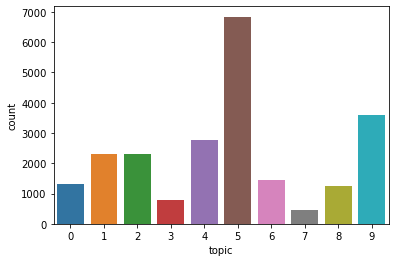

In [242]:
lda_keys = get_keys(lda_output)
lda_categories, lda_counts = keys_to_counts(lda_keys)

topics_df_lda = pd.DataFrame({'topic' : lda_categories, 'count' : lda_counts})
sns.barplot(x=topics_df_lda['topic'], y = topics_df_lda['count'])
plt.show()

* Here the topics are distributed very well as compared to LSA and the major topic is topic 5

In [244]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,year,story,game,world,book,american,life,sport,team,play,born,people,player,great,king
Topic 1,food,water,animal,people,plant,tree,year,bird,fish,like,make,green,world,scientist,small
Topic 2,people,book,computer,phone,time,word,internet,make,read,company,language,information,reading,online,like
Topic 3,space,human,scientist,people,earth,year,building,bike,robot,world,dog,science,machine,car,energy
Topic 4,school,student,year,people,china,chinese,said,teacher,country,university,class,work,education,high,college
Topic 5,said,time,friend,like,know,thing,home,good,asked,mother,life,want,year,went,little
Topic 6,city,said,people,road,year,driver,hour,train,time,police,street,travel,mile,london,driving
Topic 7,child,parent,woman,family,said,year,kid,girl,young,say,mother,percent,baby,teenager,teen
Topic 8,people,music,world,like,city,film,place,movie,park,year,country,popular,museum,time,holiday
Topic 9,people,time,life,study,make,help,person,body,health,problem,feel,good,thing,brain,sleep


In [85]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_output)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23073 samples in 0.171s...
[t-SNE] Computed neighbors for 23073 samples in 8.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23073
[t-SNE] Computed conditional probabilities for sample 2000 / 23073
[t-SNE] Computed conditional probabilities for sample 3000 / 23073
[t-SNE] Computed conditional probabilities for sample 4000 / 23073
[t-SNE] Computed conditional probabilities for sample 5000 / 23073
[t-SNE] Computed conditional probabilities for sample 6000 / 23073
[t-SNE] Computed conditional probabilities for sample 7000 / 23073
[t-SNE] Computed conditional probabilities for sample 8000 / 23073
[t-SNE] Computed conditional probabilities for sample 9000 / 23073
[t-SNE] Computed conditional probabilities for sample 10000 / 23073
[t-SNE] Computed conditional probabilities for sample 11000 / 23073
[t-SNE] Computed conditional probabilities for sample 12000 / 23073
[t-SNE] Computed conditional probabilities for sa

In [86]:
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors, n_topics=10)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(10), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(10):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text_color=colormap[t])
    plot.add_layout(label)

show(plot)

* This is a much better result! Controlling for  t -SNE, it would seem that LDA has had much more succcess than LSA in separating out the topic categories. For this reason, LDA appears the more appropriate algorithm when we scale up the clustering process in the next section.

In [87]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

* **pyLDAvis** is a interactive LDA visualization python package. 
*  The area of circle represents the importance of each topic over the entire corpus, the distance between the center of circles indicate the similarity between topics.
* For each topic, the histogram on the right side listed the top 30 most relevant terms. LDA helped me extracted 10 main topics.

In [88]:
#this is by far the easiest way to load a pre-trained sklearn lda model onto pyLDAvis
#there are other means of using this visible on pyLDAvis' main repo

display_data = pyLDAvis.sklearn.prepare(best_lda_model, #our pre-trained LDA model
                         data_vectorized, #this gives us our document-term matrix
                        vectorizer) #the vectoriser object
                        
pyLDAvis.display(display_data)  

* Each bubble represents a topic. The larger the bubble, the higher percentage of the number of articles in the corpus is about that topic.
*  **
* Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
* **
* Red bars give the estimated number of times a given term was generated by a given topic. As you can see from the image below, there are about nearly 20000 of the word **people**, and this term is used about 5,000 times within topic 8. The word with the longest red bar is the word that is used the most by the articles belonging to that topic.

* Now,looking at the right hand side of the plot there is a measure called relevance, which is similar to **exclusivity** : it denotes the degree to which a term appears in a particular topic to the exclusion of others. Relevance is based on another metric, **lift** : which is the ratio of a term’s probability within a topic to its margin probability across the corpus. 
* On one hand, it decreases the ranking of globally common terms, but on the other, it gives a high ranking to rare terms that occur in a single topic. 

* Relevance is denoted by **λ**, the weight assigned to the probability of a term in a topic relative to its lift. When λ = 1, the terms are ranked by their probabilities within the topic (the "regular" method) while when λ = 0, the terms are ranked only by their lift. The interface allows to adjust the value of λ between 0 and 1.

* The researchers conducted a study to determine whether there was an optimal value for λ regarding the use of relevance to aid topic interpretation and found that value to be 0.6

In [89]:
def clean_documents_tokens(text):
    
    if pd.isnull(text):
        return text
    
    text = text.lower()
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
            
    text         = re.sub("[^a-zA-Z#]", ' ', text)
    word_tokens  = nltk.word_tokenize(text)
    tokens       = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    
    return tokens

In [90]:
train_documents['clean_tokens'] = train_documents['document'].progress_apply(lambda x: clean_documents_tokens(x))

texts = train_documents['clean_tokens']

my bar!: 100%|██████████████████████████████████████████████████████████████████| 23073/23073 [02:28<00:00, 155.63it/s]


In [300]:
# Use Gensim's NMF to get the best num of topics via coherence score

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=4000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [383]:
# Build LDA model
lda_model_ = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

* Optimizing for perplexity may not yield human interpretable topics.
* This limitation of perplexity measure served as a motivation for more work trying to model the human judgment, and thus **Topic Coherence.**

* The concept of topic coherence combines a number of measures into a framework to evaluate the coherence between topics inferred by a model.
* **
* Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
* **
* A set of statements or facts is said to be **coherent**, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”
* **
* There are few coherent measures but we'll be looking at the one which we used and is the most popular.
* **C_v** measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.
* **
    Pointwise mutual information can be normalized between [-1,+1] resulting in -1 (in the limit) for never occurring together, 0 for independence, and +1 for complete co-occurrence.
    * **npmi≡pmi−logp(x,y)=log[p(x)p(y)]logp(x,y)−1**
    The when there are:

        no co-occurrences, logp(x,y)→−∞, so nmpi is -1,
        co-occurrences at random, logp(x,y)=log[p(x)p(y)], so nmpi is 0,
        complete co-occurrences, logp(x,y)=logp(x)=logp(y), so nmpi is 1.
* **
    * **Cosine Similarity** is used as a measureof similarity.
    Dot product between the vectors/square root of the sum of squared eucledian distiances between the vectors

In [384]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4439735240873891


* **Predictions on the unseen dataset**

In [407]:
data_vectorized_test      =vectorizer.transform(test_documents['clean_document'])
lda_top_test              =best_lda_model.transform(data_vectorized_test)

In [406]:
documet_topic_lda_test = topics_document(lda_top_test, n_topics=10, data=test_documents)
documet_topic_lda_test

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.08,0.00,0.00,0.00,0.13,0.08,0.15,0.17,0.12,0.27,9
Doc1,0.06,0.00,0.00,0.00,0.25,0.36,0.04,0.23,0.05,0.00,5
Doc2,0.00,0.00,0.10,0.00,0.00,0.12,0.00,0.02,0.00,0.76,9
Doc3,0.00,0.13,0.34,0.00,0.03,0.00,0.07,0.00,0.00,0.42,9
Doc4,0.16,0.00,0.00,0.00,0.00,0.65,0.02,0.04,0.00,0.13,5
...,...,...,...,...,...,...,...,...,...,...,...
Doc2559,0.20,0.28,0.07,0.00,0.06,0.38,0.00,0.00,0.00,0.00,5
Doc2560,0.00,0.00,0.00,0.00,0.75,0.23,0.00,0.01,0.00,0.00,4
Doc2561,0.03,0.01,0.09,0.25,0.32,0.05,0.02,0.06,0.11,0.04,4
Doc2562,0.00,0.13,0.00,0.00,0.00,0.57,0.08,0.00,0.05,0.16,5


* **NMF**

* * **Non-Negative Matrix Factorization (NMF)** works in way that, it decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.
* **
* Using the original matrix (A), NMF will give you two matrices (W and H). W is the topics it found and H is the coefficients (weights) for those topics. In other words, A is articles by words (original), H is articles by topics and W is topics by words.
* **
* NMF will modify the initial values of W and H so that the product approaches A until either the approximation error converges or the max iterations are reached. We will proceed with the tfidf values

In [91]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=4000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(texts)

In [310]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(7, 25, 3))

In [311]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

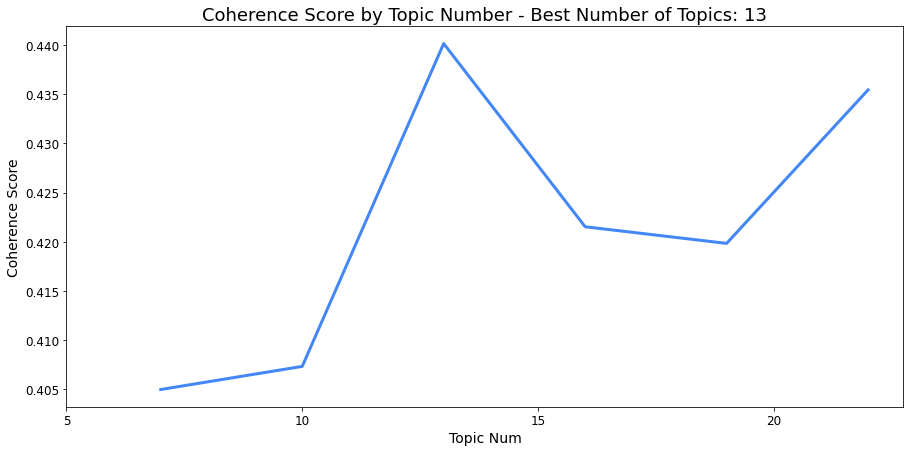

In [312]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


* Fitting * **13** topics using NMF

In [92]:
nmf = NMF(n_components=13, random_state=43, init='nndsvd')
nmf_output = nmf.fit_transform(tfidf)

nmf_feature_names = tfidf_vectorizer.get_feature_names()
nmf_weights = nmf.components_

In [314]:
# get topics with their terms and weights
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index]) for wt, index in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])

    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms, sorted_weights)]

    return topics


# prints components of all the topics
# obtained from topic modeling
def print_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     display_weights=False,
                     num_terms=None):

    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        #print(topic)
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        if display_weights:
            print('Topic #'+str(index+1)+' with weights')
            print(topic[:num_terms]) if num_terms else topic
        else:
            print('Topic #'+str(index+1)+' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms]) if num_terms else tw

# prints components of all the topics
# obtained from topic modeling
def get_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     num_terms=None):

    topic_terms = []

    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        #print(topic)
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        topic_terms.append(topic[:num_terms] if num_terms else topic)

    return topic_terms

def getTermsAndSizes(topic_display_list_item):
    terms = []
    sizes = []
    for term, size in topic_display_list_item:
        terms.append(term)
        sizes.append(size)
    return terms, sizes

* Important terms in each Topic

In [315]:
topics = get_topics_terms_weights(nmf_weights, nmf_feature_names)
print_topics_udf(topics, total_topics=2, num_terms=30, display_weights=True)

Topic #1 with weights
[('said', 1.74), ('would', 1.14), ('mother', 1.03), ('father', 0.91), ('went', 0.91), ('could', 0.89), ('asked', 0.84), ('back', 0.74), ('came', 0.74), ('told', 0.7), ('house', 0.68), ('looked', 0.64), ('home', 0.63), ('woman', 0.58), ('year', 0.57), ('little', 0.57), ('took', 0.56), ('girl', 0.56), ('thought', 0.54), ('never', 0.5), ('door', 0.5), ('wanted', 0.48), ('time', 0.48), ('room', 0.46), ('knew', 0.46), ('left', 0.45), ('later', 0.43), ('wife', 0.43), ('morning', 0.42), ('gave', 0.42)]
Topic #2 with weights
[('student', 2.28), ('school', 2.09), ('teacher', 0.92), ('class', 0.71), ('high school', 0.53), ('college', 0.52), ('education', 0.44), ('high', 0.44), ('university', 0.33), ('grade', 0.3), ('classroom', 0.27), ('test', 0.26), ('study', 0.25), ('school student', 0.24), ('homework', 0.23), ('exam', 0.22), ('year', 0.22), ('math', 0.21), ('middle school', 0.21), ('learning', 0.19), ('teaching', 0.18), ('course', 0.18), ('middle', 0.17), ('graduate', 0.

* Visualize NMF Topics

In [317]:
topics_display_list = get_topics_udf(topics, total_topics=2, num_terms=30)

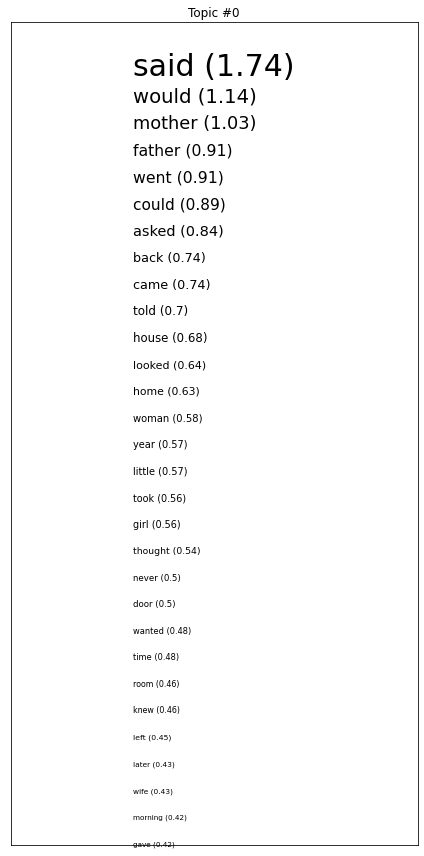

In [318]:
terms, sizes = getTermsAndSizes(topics_display_list[0])

num_top_words = 30
fontsize_base = 30 / np.max(sizes) # font size for word with largest share in corpus

num_topics = 1

for t in range(num_topics):
    fig, ax = plt.subplots(1, num_topics, figsize=(6, 12))
    plt.ylim(0, num_top_words + 1.0)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base*share)

plt.tight_layout()

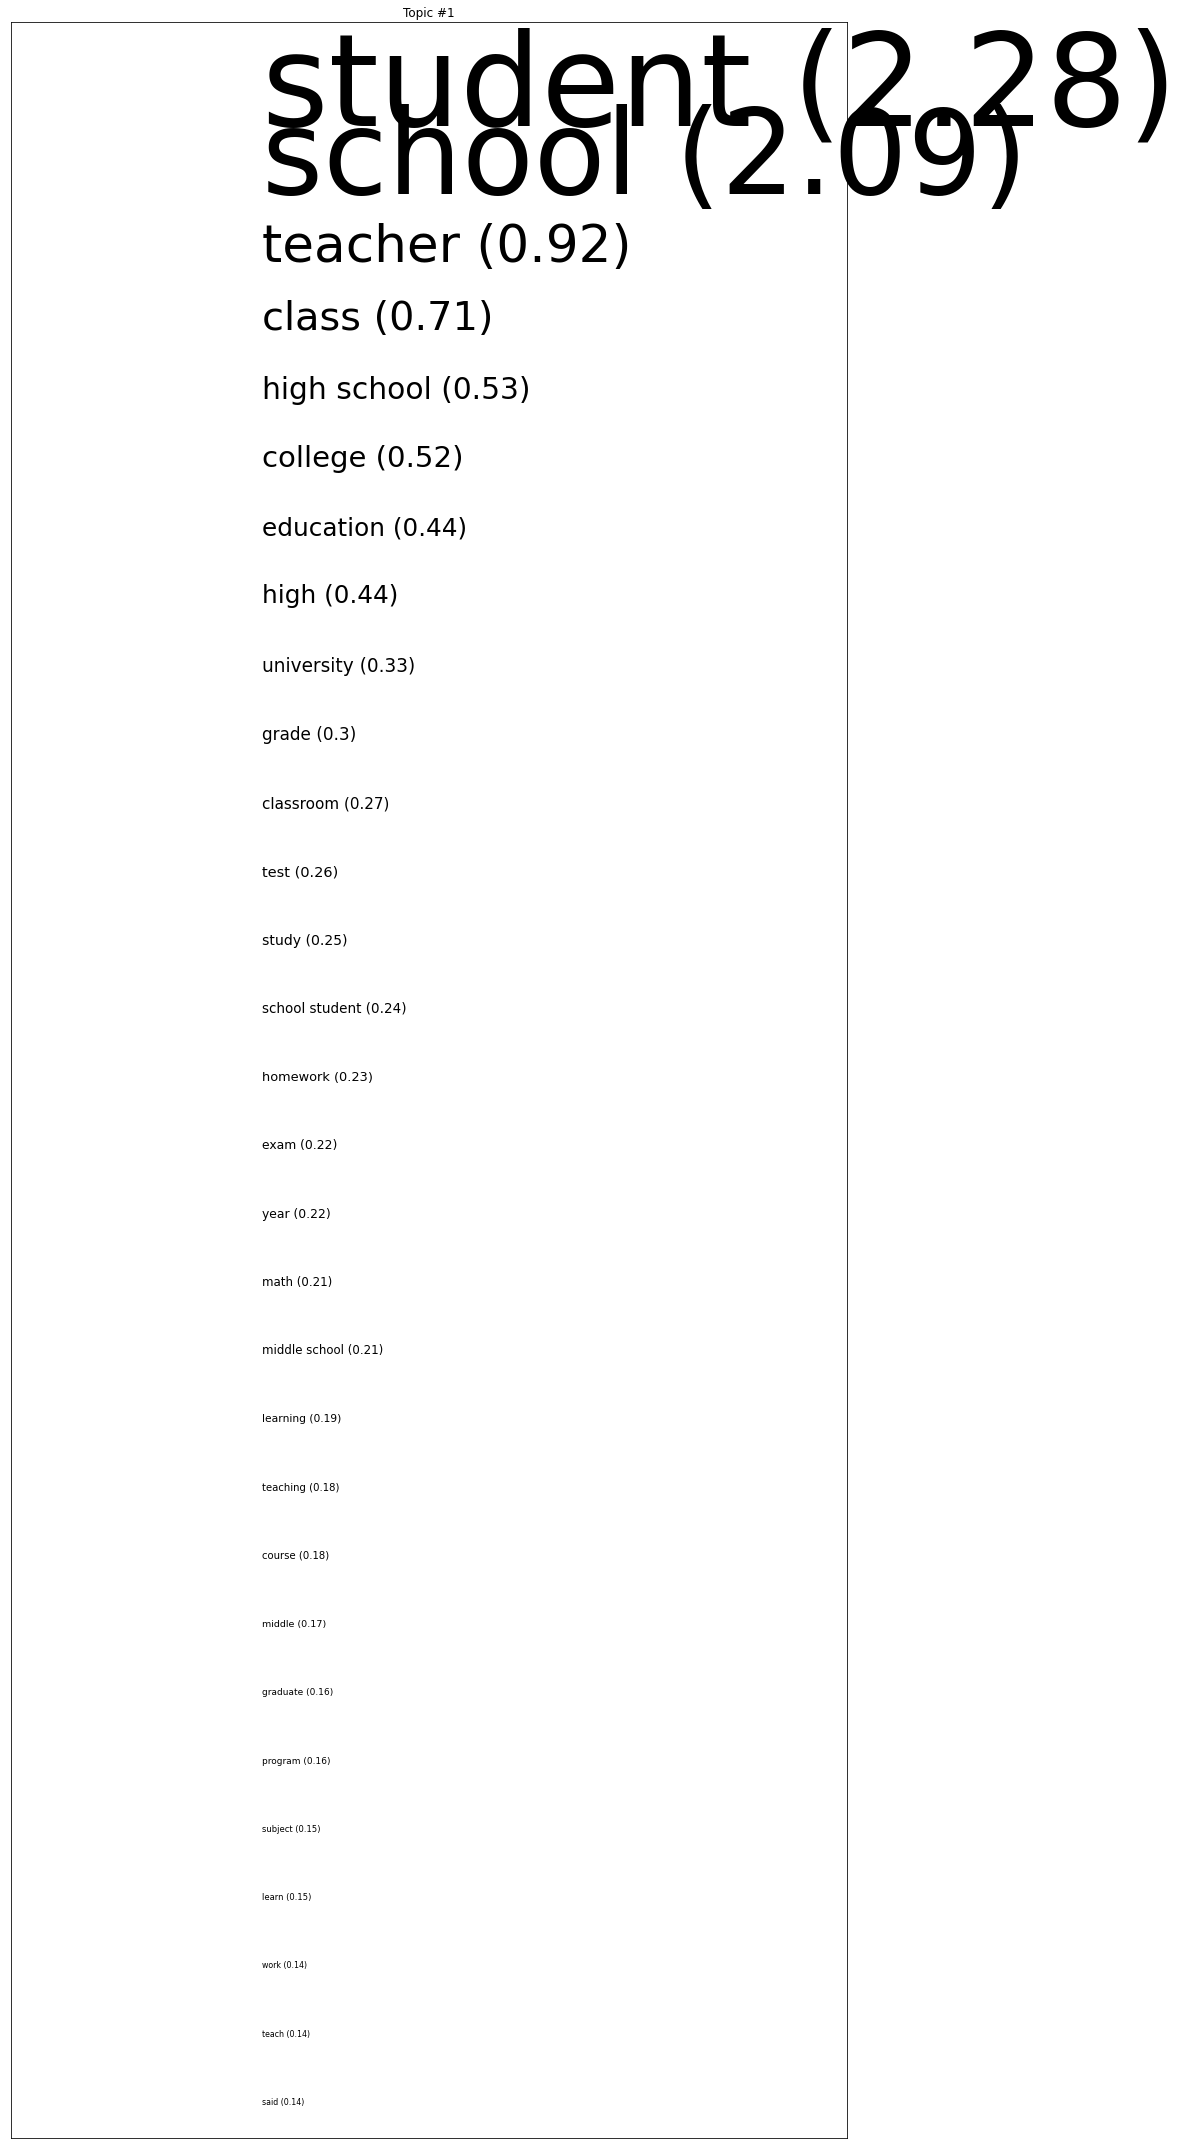

In [319]:
terms, sizes = getTermsAndSizes(topics_display_list[1])

num_top_words = 30
fontsize_base = 160 / (np.max(sizes))*0.8 # font size for word with largest share in corpus

num_topics = 1

for t in range(num_topics):
    fig, ax = plt.subplots(1, num_topics, figsize=(16, 30))
    plt.ylim(0, num_top_words + 1.0)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t+1))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-.5, word, fontsize=fontsize_base*share)

plt.tight_layout()

In [408]:
documet_topic_nmf = topics_document(nmf_output, n_topics=13, data=train_documents)
documet_topic_nmf

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,dominant_topic
Doc0,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0
Doc1,0.02,0.00,0.00,0.01,0.02,0.03,0.00,0.00,0.00,0.03,0.00,0.00,0.01,5
Doc2,0.01,0.01,0.00,0.00,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,4
Doc3,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Doc4,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.03,0.00,0.00,0.00,0.03,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc23068,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.03,12
Doc23069,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.03,0.00,0.08,0.00,0.03,10
Doc23070,0.02,0.04,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,1
Doc23071,0.03,0.08,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,1


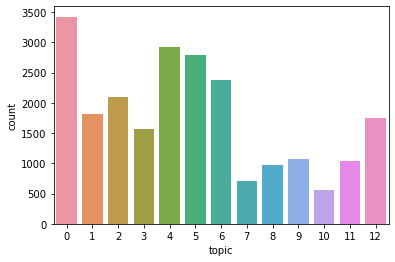

In [324]:
nmf_keys = get_keys(nmf_output)
nmf_categories, nmf_counts = keys_to_counts(nmf_keys)

topics_df_nmf = pd.DataFrame({'topic' : nmf_categories, 'count' : nmf_counts})
sns.barplot(x=topics_df_nmf['topic'], y = topics_df_nmf['count'])
plt.show()

In [394]:
vocab = tfidf_vectorizer.get_feature_names()

for i, comp in enumerate(nmf.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
said would mother father went could asked back came told 

Topic 1: 
student school teacher class high school college education high university grade 

Topic 2: 
study sleep woman brain researcher health research body scientist found 

Topic 3: 
child parent kid family school mother father young home adult 

Topic 4: 
friend people life make thing feel good like time know 

Topic 5: 
city china chinese people country world year american state many 

Topic 6: 
water animal plant tree earth fish bird scientist ocean river 

Topic 7: 
english language word speak learn chinese learning speaker speaking foreign 

Topic 8: 
book reading read story reader library writer writing novel write 

Topic 9: 
food eating meal vegetable meat restaurant healthy fruit diet drink 

Topic 10: 
phone mobile mobile phone cell cell phone call device driver message text 

Topic 11: 
music song play game player sport playing singer played like 

Topic 12: 
computer internet online company money infor

In [93]:
panel = pyLDAvis.sklearn.prepare(nmf, tfidf, tfidf_vectorizer, mds='tsne')
pyLDAvis.display(panel)

* **Predictions on the unseen dataset**

In [392]:
test_documents['clean_tokens'] = test_documents['document'].progress_apply(lambda x: clean_documents_tokens(x))

my bar!: 100%|████████████████████████████████████████████████████████████████████| 2564/2564 [00:07<00:00, 347.67it/s]


In [409]:
data_vectorized_test      =tfidf_vectorizer.transform(test_documents['clean_tokens'])
nmf_top_test              =nmf.transform(data_vectorized_test)

In [410]:
documet_topic_nmf_test = topics_document(nmf_top_test, n_topics=13, data=test_documents)
documet_topic_nmf_test

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,dominant_topic
Doc0,0.01,0.03,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
Doc1,0.02,0.00,0.00,0.02,0.02,0.02,0.00,0.01,0.00,0.00,0.00,0.0,0.00,0
Doc2,0.00,0.00,0.02,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.0,0.00,4
Doc3,0.00,0.00,0.01,0.00,0.02,0.00,0.05,0.03,0.00,0.00,0.01,0.0,0.00,6
Doc4,0.03,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc2559,0.02,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0
Doc2560,0.00,0.06,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.0,0.01,1
Doc2561,0.00,0.01,0.02,0.00,0.01,0.05,0.01,0.00,0.00,0.00,0.00,0.0,0.02,5
Doc2562,0.02,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0


* We wil be proceeding with **NMF** though Coherence of LDA is a bit more but using pyLDAvis plot and topic distirbution for the words, the topics are much distributed clearly giving significant differences in the top words
* **
* Though it is proven that LDA is quite stable and is the state of the art model.
* Hence, we will be going final with the LDA as well as NMF